In [1]:
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import os
import math

In [2]:
def readRootTrees(runNumber: int) -> dict:
    """
    Reads all trees from a ROOT file and returns them as a dictionary.
    The keys are the tree names and the values are pandas DataFrames.

    Args:
        runNumber (int): The run number of the ROOT file.

    Returns:
        dict: A dictionary where keys are tree names (str) and
              values are pandas DataFrames. Returns an empty dictionary
              if the file cannot be opened or contains no trees.
    """

    dataFilePath = "Data/"
    dataFile = f"sim.{runNumber}.root"
    fullFilePath = os.path.join(dataFilePath, dataFile)
    
    try:
        with uproot.open(fullFilePath) as rootFile:
            dataframes = {}
            for treeName in rootFile.keys():
                if isinstance(rootFile[treeName], uproot.behaviors.TTree.TTree):
                    tree = rootFile[treeName]
                    try:
                        df = tree.arrays(library="pd")
                        dataframes[treeName] = df
                    except Exception as e:
                        print(f"Error reading tree '{treeName}': {e}")
            return dataframes
    except Exception as e:
        print(f"Error opening or reading ROOT file '{fullFilePath}': {e}")
        return {}

In [3]:
simData = readRootTrees(5159)
for key in simData:
    print(key)
#print(simData)

fieldLineDataTree;1
metaDataTree;1
electronDataTree;1
ionDataTree;1
avalancheDataTree;1


In [4]:
#Read the dataframes from the dict into clearer dataframes
metaData = simData["metaDataTree;1"]
fieldLineData = simData["fieldLineDataTree;1"]
electronData = simData["electronDataTree;1"]
ionData = simData["ionDataTree;1"]
avalancheData = simData["avalancheDataTree;1"]

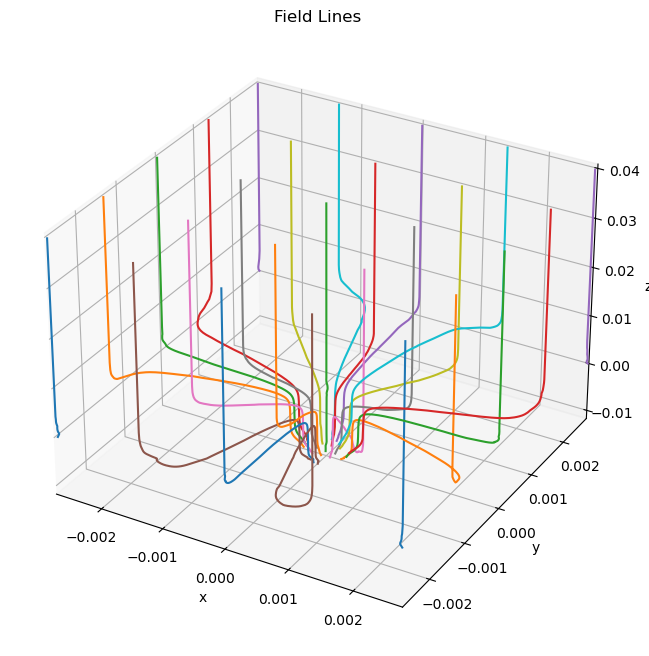

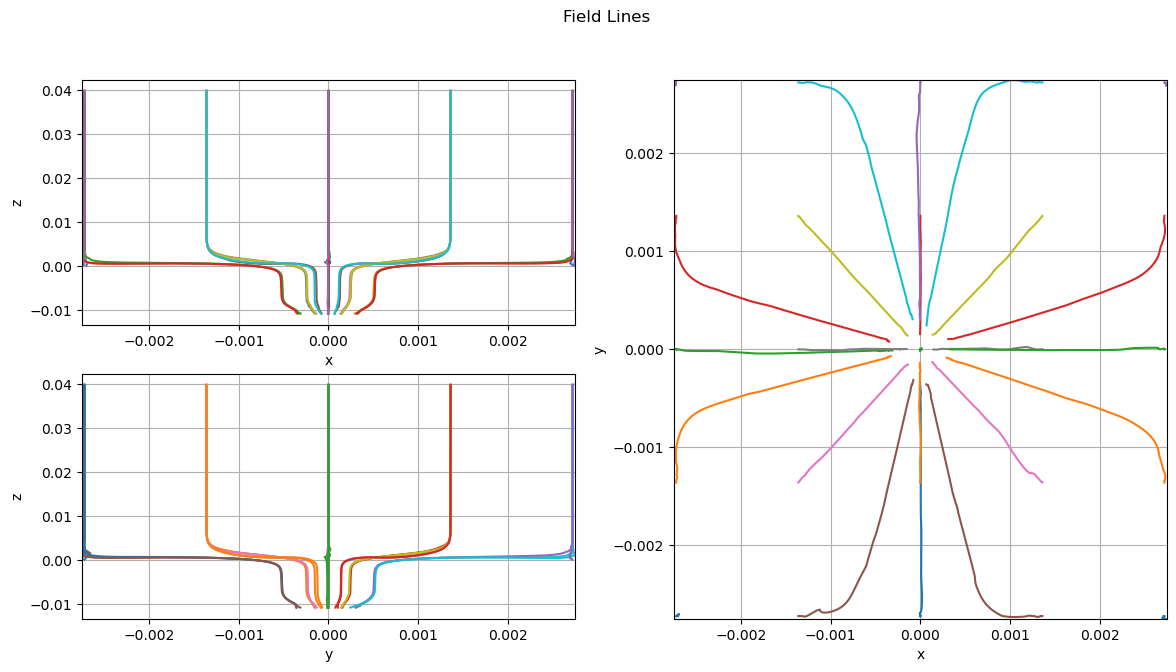

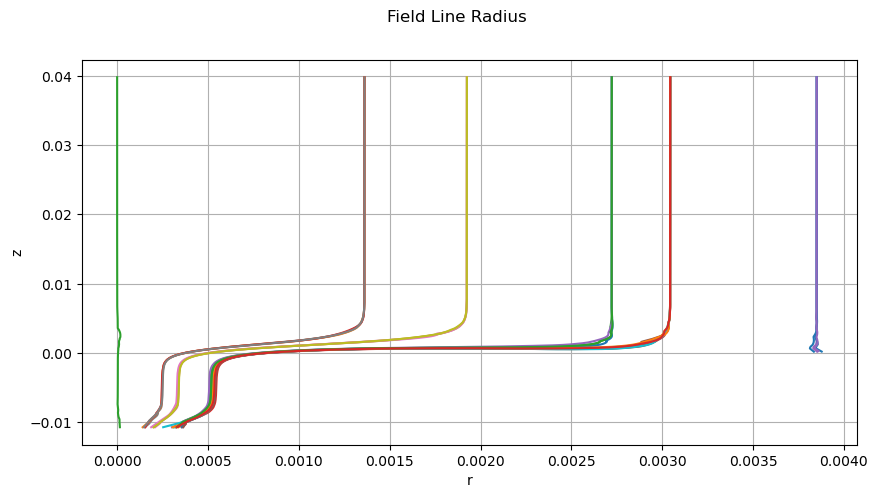

In [5]:
#visualize the field lines
uniqueID = fieldLineData['Field Line ID'].unique()
halfPitch = metaData["Pitch"].iloc[0]/2.

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')

for lineID in uniqueID:
    fieldLine = fieldLineData[fieldLineData['Field Line ID'] == lineID]
    ax.plot(fieldLine['Field Line x'], \
            fieldLine['Field Line y'], \
            fieldLine['Field Line z'])

ax.set_xlim(-halfPitch, halfPitch)
ax.set_ylim(-halfPitch, halfPitch)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Field Lines')
plt.show()


groupedLines = fieldLineData.groupby('Field Line ID')

fig = plt.figure(figsize=(14, 7))
fig.suptitle('Field Lines')

ax11 = fig.add_subplot(221)
ax12 = fig.add_subplot(223)
ax13 = fig.add_subplot(122) 

for lineID, fieldLine in groupedLines:
    ax11.plot(fieldLine['Field Line x'], \
              fieldLine['Field Line z'])
    ax12.plot(fieldLine['Field Line y'], \
              fieldLine['Field Line z'])
    ax13.plot(fieldLine['Field Line x'], \
              fieldLine['Field Line y'])

ax11.set_xlim(-halfPitch, halfPitch)
ax12.set_xlim(-halfPitch, halfPitch)
ax13.set_xlim(-halfPitch, halfPitch)
ax13.set_ylim(-halfPitch, halfPitch)

ax11.set_xlabel('x')
ax11.set_ylabel('z')
ax12.set_xlabel('y')
ax12.set_ylabel('z')
ax13.set_xlabel('x')
ax13.set_ylabel('y')

ax11.grid()
ax12.grid()
ax13.grid()

plt.show()

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
fig.suptitle('Field Line Radius')
                 
for lineID, fieldLine in groupedLines:
    radius = np.sqrt(np.power(fieldLine['Field Line x'], 2) \
                     + np.power(fieldLine['Field Line y'], 2))    
    ax1.plot(radius, fieldLine['Field Line z'])
    
ax1.set_xlabel('r')
ax1.set_ylabel('z')
ax1.grid()

plt.show()


In [6]:
#Get information from a single avalanche
plotAvalanche = 5
electronData0 = electronData[electronData["Avalanche ID"] == plotAvalanche].reset_index(drop=True)
ionData0 = ionData[ionData["Avalanche ID"] == plotAvalanche].reset_index(drop=True)

#Checking to make sure ions/electron ID's match - CONFIRMED
initialIon = ionData0[ionData0["Ion Charge"] == 1].reset_index(drop=True)

difference = pd.DataFrame({
    'x_diff': electronData0['Initial x'] - initialIon['Initial x'],
    'y_diff': electronData0['Initial y'] - initialIon['Initial y'],
    'z_diff': electronData0['Initial z'] - initialIon['Initial z']
})

numNonZero = np.count_nonzero(difference)
print(f"The number of non-zero entries is: {numNonZero}")

The number of non-zero entries is: 0


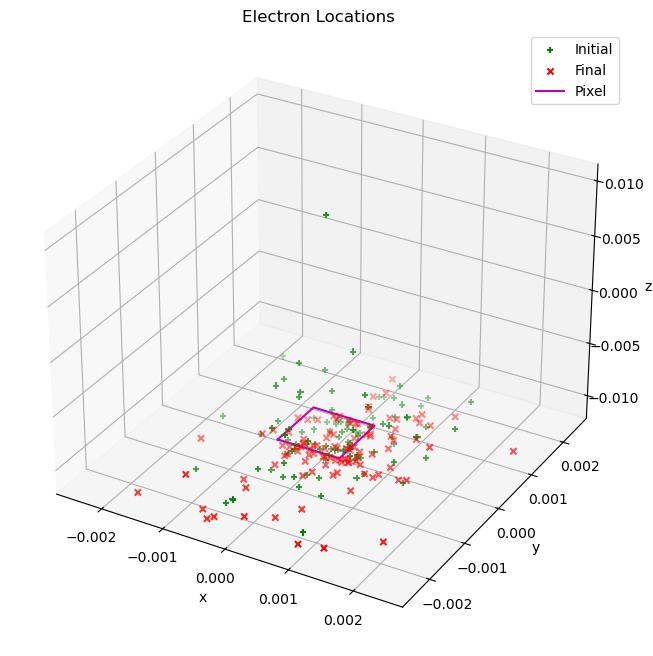

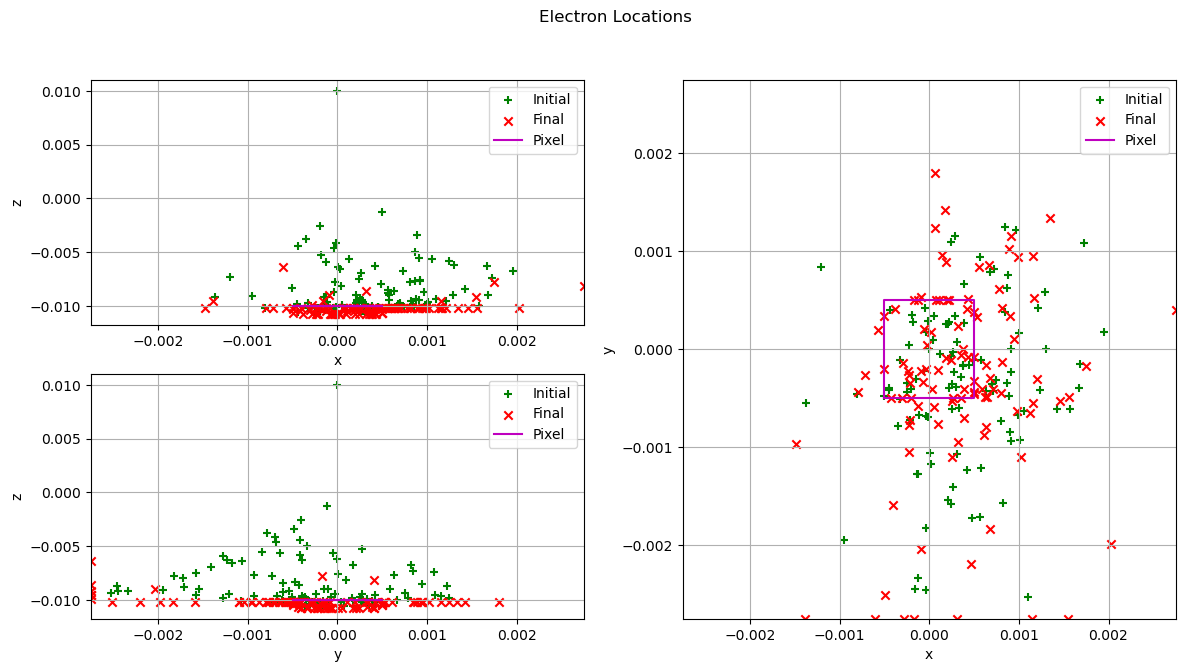

In [7]:
#Plotting the inital and final electron locations for the chosen single avalanche.
halfPitch = metaData["Pitch"].iloc[0]/2.
halfPixel = metaData["Pixel Width"].iloc[0]/2.

pixelX = [-halfPixel, -halfPixel, halfPixel, halfPixel, -halfPixel]
pixelY = [-halfPixel, halfPixel, halfPixel, -halfPixel, -halfPixel]
pixelZ = [-metaData["Mesh Standoff"].iloc[0], \
          -metaData["Mesh Standoff"].iloc[0], \
          -metaData["Mesh Standoff"].iloc[0], \
          -metaData["Mesh Standoff"].iloc[0], \
          -metaData["Mesh Standoff"].iloc[0]]

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(electronData0['Initial x'], \
           electronData0['Initial y'], \
           electronData0['Initial z'], \
           label='Initial', color='g', marker='+')
ax.scatter(electronData0['Final x'], \
           electronData0['Final y'], \
           electronData0['Final z'], \
           label='Final', color='r', marker='x')
ax.plot(pixelX, pixelY, pixelZ, label='Pixel', color='m')
    
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Electron Locations')
ax.legend()

ax.set_xlim(-halfPitch, halfPitch)
ax.set_ylim(-halfPitch, halfPitch)
plt.show()


fig = plt.figure(figsize=(14, 7))
fig.suptitle('Electron Locations')

ax11 = fig.add_subplot(221)
ax12 = fig.add_subplot(223)
ax13 = fig.add_subplot(122) 

ax11.scatter(electronData0['Initial x'], \
             electronData0['Initial z'], \
             label='Initial', color='g', marker='+')
ax12.scatter(electronData0['Initial y'], \
             electronData0['Initial z'], \
             label='Initial', color='g', marker='+')
ax13.scatter(electronData0['Initial x'], \
             electronData0['Initial y'], \
             label='Initial', color='g', marker='+')

ax11.scatter(electronData0['Final x'], \
             electronData0['Final z'], \
             label='Final', color='r', marker='x')
ax12.scatter(electronData0['Final y'], \
             electronData0['Final z'], \
             label='Final', color='r', marker='x')
ax13.scatter(electronData0['Final x'], \
             electronData0['Final y'], \
             label='Final', color='r', marker='x')

ax11.plot(pixelX, pixelZ, label='Pixel', color='m')
ax12.plot(pixelY, pixelZ, label='Pixel', color='m')
ax13.plot(pixelX, pixelY, label='Pixel', color='m')

ax11.set_xlabel('x')
ax11.set_ylabel('z')
ax12.set_xlabel('y')
ax12.set_ylabel('z')
ax13.set_xlabel('x')
ax13.set_ylabel('y')

ax11.legend()
ax12.legend()
ax13.legend()

ax11.set_xlim(-halfPitch, halfPitch)
ax12.set_xlim(-halfPitch, halfPitch)
ax13.set_xlim(-halfPitch, halfPitch)
ax13.set_ylim(-halfPitch, halfPitch)

ax11.grid()
ax12.grid()
ax13.grid()

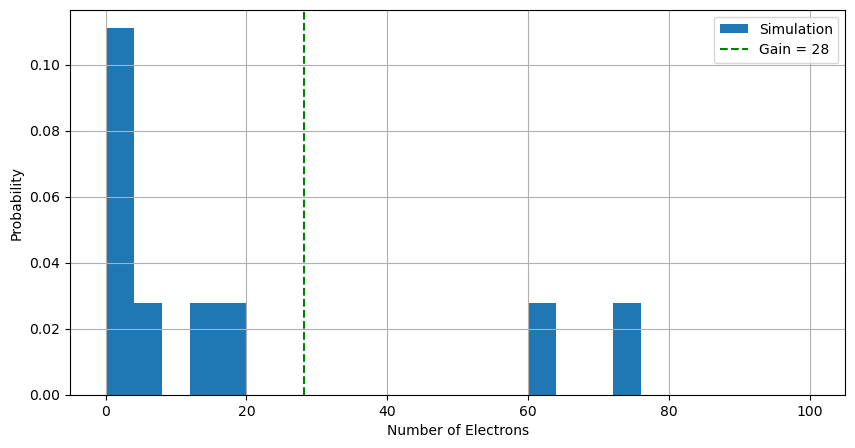

In [8]:
#Plot the avalanche size histogram - for gains

fig = plt.figure(figsize=(10, 5))
gain = avalancheData["Total Electrons"].mean()
numBins = 25
plt.hist(avalancheData["Total Electrons"], bins=numBins, range=(0,100), label="Simulation", density=True)
plt.axvline(x=gain, color='g', linestyle='--', label=f"Gain = {gain:.0f}")
plt.xlabel('Number of Electrons')
plt.ylabel('Probability')
plt.grid()
plt.legend()
plt.show()

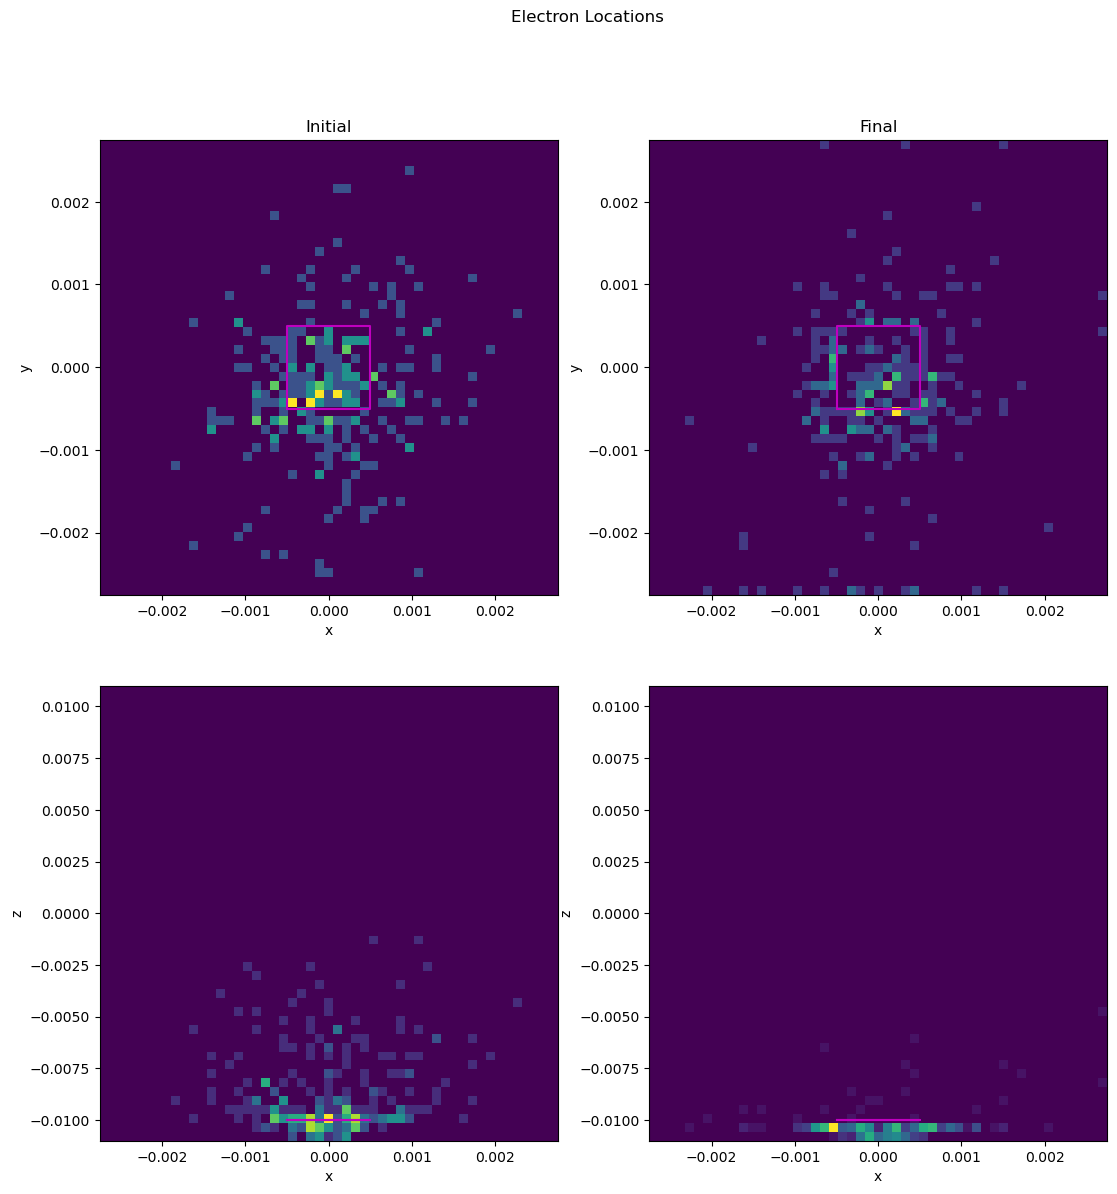

In [9]:
#Plot the initial and final electron locations for all avalanches

#Exclude the initial electron (so many it washes out other details)
newElectrons = electronData[electronData["Electron ID"] != 0]

numBins=51

halfPitch = metaData["Pitch"].iloc[0]/2.

fig = plt.figure(figsize=(13, 13))
fig.suptitle('Electron Locations')

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


ax1.hist2d(newElectrons["Initial x"], \
           newElectrons["Initial y"], \
           bins=numBins, range=[[-halfPitch, halfPitch], [-halfPitch, halfPitch]])
ax2.hist2d(newElectrons["Final x"], \
           newElectrons["Final y"], \
           bins=numBins, range=[[-halfPitch, halfPitch], [-halfPitch, halfPitch]])
ax3.hist2d(newElectrons["Initial x"], \
           newElectrons["Initial z"], \
           bins=numBins, range=[[-halfPitch, halfPitch], [-0.011, 0.011]])
ax4.hist2d(newElectrons["Final x"], \
           newElectrons["Final z"], \
           bins=numBins, range=[[-halfPitch, halfPitch], [-0.011, 0.011]])

ax1.plot(pixelX, pixelY, label='Pixel', color='m')
ax2.plot(pixelX, pixelY, label='Pixel', color='m')
ax3.plot(pixelX, pixelZ, label='Pixel', color='m')
ax4.plot(pixelX, pixelZ, label='Pixel', color='m')

ax1.set_title('Initial')
ax2.set_title('Final')

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax3.set_xlabel('x')
ax3.set_ylabel('z')
ax4.set_xlabel('x')
ax4.set_ylabel('z')

plt.show()

In [10]:
print(electronData)

     Avalanche ID  Electron ID  Initial x  Initial y  Initial z  Initial Time  \
0               0            0   0.000000   0.000000   0.010000      0.000000   
1               0            1  -0.000054   0.000248  -0.003550      2.211419   
2               0            2   0.000394   0.000329  -0.006008      2.397232   
3               0            3   0.000808   0.000956  -0.008960      2.695352   
4               0            4   0.000248   0.000778  -0.009436      2.718548   
..            ...          ...        ...        ...        ...           ...   
277             8           13  -0.000239   0.000751  -0.010033      2.629009   
278             8           14  -0.000347   0.001098  -0.009526      2.542625   
279             8           15  -0.000327   0.000719  -0.009721      2.549349   
280             8           16  -0.000647   0.000227  -0.010054      2.664109   
281             9            0   0.000000   0.000000   0.010000      0.000000   

     Initial Energy   Final